
# Librería Pandas

Construida sobre Numpy ofrece mecanismos para gestión sencilla de datos en formato tabular.



In [15]:
import pandas as pd

Elementos principales:
- Serie
- Dataframe

Pueden crearse a partir de arrays, estructuras json/dict o directamente leyendo de un fichero

## Series

In [16]:
s = pd.Series([1,24,5,6], index=['A', 'B', 'C', 'D'])

print(s)
print(s.values)
print(s.index)
s['A']

A     1
B    24
C     5
D     6
dtype: int64
[ 1 24  5  6]
Index(['A', 'B', 'C', 'D'], dtype='object')


np.int64(1)

## Dataframes

In [17]:
datos = [['España', 'Madrid', 47 ],
         ['Portugal', 'Lisboa', 10],
         ['Francia', 'Paris', 68],
         ['Alemania', 'Berlin', 80]]
df1 = pd.DataFrame(datos, columns=['Pais', 'Capital', 'Poblacion'])

df1

,Pais,Capital,Poblacion
0,España,Madrid,47
1,Portugal,Lisboa,10
2,Francia,Paris,68
3,Alemania,Berlin,80


In [18]:
data = [{'a': i, 'b': 2 * i, 'c': 3*i-1} for i in range(4)]
df2 = pd.DataFrame(data)

df2

,a,b,c
0,0,0,-1
1,1,2,2
2,2,4,5
3,3,6,8


In [19]:
#dfCSV = pd.read_csv('20codmun.csv')     # pd.to_csv('file.csv') Escribe un df en formato CSV
dfEx = pd.read_excel('20codmun.xlsx')   # pd.to_excel('file.xlsx') Escribe un df en formato Excel

dfEx


,CODAUTO,CPRO,CMUN,DC,NOMBRE
0,16,1,51,3,Agurain/Salvatierra
1,16,1,1,4,Alegría-Dulantzi
2,16,1,2,9,Amurrio
3,16,1,49,3,Añana
4,16,1,3,5,Aramaio
...,...,...,...,...,...
8126,2,50,296,7,"Zaida, La"
8127,2,50,297,3,Zaragoza
8128,2,50,298,9,Zuera
8129,18,51,1,3,Ceuta


### Acceso a elementos 

Podemos acceder a los elementos de dataframe mediante índices y mediante el nombre de la clave. Para ello usaremos las funciones loc e iloc

In [20]:
print(dfEx.iloc[3000:3002])
print(dfEx.loc[2444, 'NOMBRE'])

      CODAUTO  CPRO  CMUN  DC             NOMBRE
3000        8    19   181   1  Miedes de Atienza
3001        8    19   182   6         Mierla, La
Villarejo-Periesteban


### Slicing

Podemos obtener subconjuntos del dataframe


In [21]:
print(dfEx.loc[4101:4114, 'NOMBRE'])

4101                     Corera
4102                    Cornago
4103                 Corporales
4104    Cuzcurrita de Río Tirón
4105            Daroca de Rioja
4106                     Enciso
4107                    Entrena
4108                    Estollo
4109                    Ezcaray
4110                     Foncea
4111                 Fonzaleche
4112                  Fuenmayor
4113                 Galbárruli
4114                    Galilea
Name: NOMBRE, dtype: object


In [22]:
print(dfEx.loc[3100:3104])

      CODAUTO  CPRO  CMUN  DC     NOMBRE
3100        8    19   288   4   Tortuero
3101        8    19   289   7      Traíd
3102        8    19   290   1  Trijueque
3103        8    19   291   8     Trillo
3104        8    19   293   9      Uceda


### Filtrado condicional

Incuyendo condiciones entre los corchetes

In [23]:
dfEx[dfEx['CPRO']==23]

,CODAUTO,CPRO,CMUN,DC,NOMBRE
3510,1,23,1,1,Albanchez de Mágina
3511,1,23,2,6,Alcalá la Real
3512,1,23,3,2,Alcaudete
3513,1,23,4,7,Aldeaquemada
3514,1,23,5,0,Andújar
...,...,...,...,...,...
3602,1,23,97,0,Villanueva del Arzobispo
3603,1,23,98,6,Villardompardo
3604,1,23,99,9,"Villares, Los"
3605,1,23,101,0,Villarrodrigo


In [24]:
print(dfEx[dfEx['NOMBRE']=='Tres Cantos'])

      CODAUTO  CPRO  CMUN  DC       NOMBRE
4439       13    28   903   6  Tres Cantos


In [25]:
ciudadInfo = dfEx[dfEx['NOMBRE']=='Tres Cantos']
print("Dimensiones: ",ciudadInfo.shape)
print(ciudadInfo.iloc[0,1])
print(ciudadInfo.iloc[0,2])

Dimensiones:  (1, 5)
28
903


#### Características del Dataframe



- Información general (info())
- Magnitudes estadísticas (describe())
- Primeras i líneas (head(i))
- Últimas i líneas (tail(i))
- Dimensiones (ndim)
- Elementos en cada dimensión (shape)

In [26]:
dfEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8131 entries, 0 to 8130
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CODAUTO  8131 non-null   int64 
 1   CPRO     8131 non-null   int64 
 2   CMUN     8131 non-null   int64 
 3   DC       8131 non-null   int64 
 4   NOMBRE   8131 non-null   object
dtypes: int64(4), object(1)
memory usage: 317.7+ KB


In [27]:
dfEx.describe()

,CODAUTO,CPRO,CMUN,DC
count,8131.000000,8131.000000,8131.000000,8131.000000
mean,7.736318,26.657115,131.071578,4.523429
std,4.030979,14.893232,145.940790,2.869749
min,1.000000,1.000000,1.000000,0.000000
25%,7.000000,13.000000,43.000000,2.000000
50%,7.000000,26.000000,95.000000,5.000000
75%,10.000000,41.000000,176.000000,7.000000
max,19.000000,52.000000,916.000000,9.000000


#### Representación gráfica del Dataframe

Los dataframes directamente se pueden representar gráficamente

Matplotlib is building the font cache; this may take a moment.


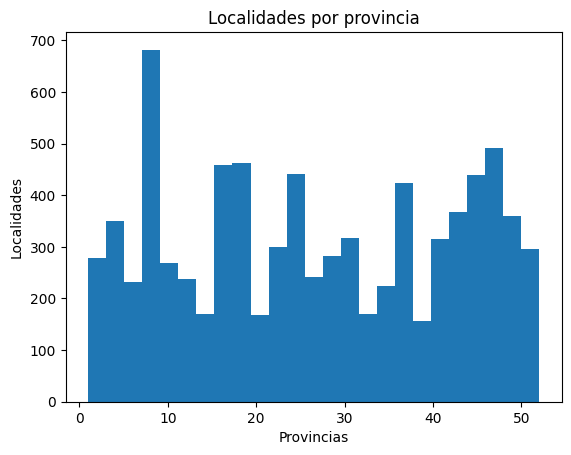

In [28]:
dfPro = dfEx.loc[:,'CPRO']

ax = dfPro.plot.hist(bins=25, stacked=True)
ax.set_title('Localidades por provincia')
ax.set_xlabel('Provincias')
ax.set_ylabel('Localidades')
fig = ax.figure
